<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/Cleo_Gomes_da_Rocha_Santos_Exercicios_Frequencias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
!pip install pydataset --quiet
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 55.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


In [ ]:
enem = pd.read_json('/content/drive/MyDrive/enem_2023.json')
enem1 = enem.describe()
enem1

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?

R: Redação

In [ ]:
enem1.loc["amplitude"] = enem1.loc['max'] - enem1.loc['min']
enem1.loc["amplitude"]

Linguagens              517.456317
Ciências humanas        474.019695
Ciências da natureza    487.604568
Matemática              488.077902
Redação                 729.160035
Name: amplitude, dtype: float64

2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)


In [ ]:
#media
print("Média das disciplinas")
enem1.mean()

Média das disciplinas


Linguagens              516.609827
Ciências humanas        516.671068
Ciências da natureza    500.002793
Matemática              529.744807
Redação                 613.428412
dtype: float64

In [ ]:
#mediana
print("Mediana das disciplinas")
null_filter = enem1.mask(enem1.isnull(), np.nan)
enem_clean = null_filter.dropna()
enem_clean.median()

Mediana das disciplinas


Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    499.315583
Matemática              533.247767
Redação                 637.783532
dtype: float64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [ ]:
#media ponderada
media_notas = ((enem["Redação"]*2) + (enem["Matemática"]*4) + (enem["Linguagens"] *2) + (enem["Ciências humanas"]) + (enem["Ciências da natureza"])) / 10
enem["Média de CC"] = media_notas

#media e desvio padrão da nota final dos 500+
print("Média e desvio padrão dos 500 mais bem colocados")
rank500 = media_notas.nlargest(500)
rank500.agg(["mean", np.std])

Média e desvio padrão dos 500 mais bem colocados


mean    557.289677
std      40.435866
dtype: float64

4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
# Média e variância das notas dos aprovados em ciência da computação
print("Média e variância dos 40 aprovados")
rank40 = media_notas.nlargest(40)
rank40.agg(["mean", "var"])

Média e variância dos 40 aprovados


mean    636.682742
var     295.767504
dtype: float64

5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
#terceiro quartil matemática
enem["Matemática"].quantile(0.75)

592.9129628887

In [ ]:
#terceiro quartil linguagens
enem["Linguagens"].quantile(0.75)

571.6358759278

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

**R: São simétricos, pois ambos os lados (esquerdo e direito) possuem espelhamento a partir do ponto médio em forma de sino, o que conclu-se ser uma distribuição normal.**

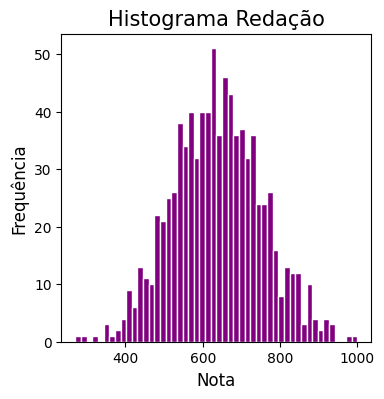

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(enem["Redação"], bins=50, color="purple", edgecolor="white")
plt.title("Histograma Redação", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

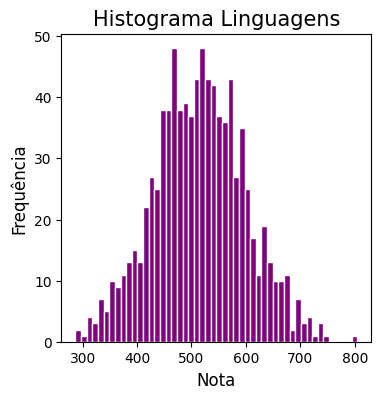

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(enem["Linguagens"], bins=50, color='purple', edgecolor="white")
plt.title("Histograma Linguagens", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

**R: Continuam simétricos, o que indica que a distribuição dos dados é consistente.**


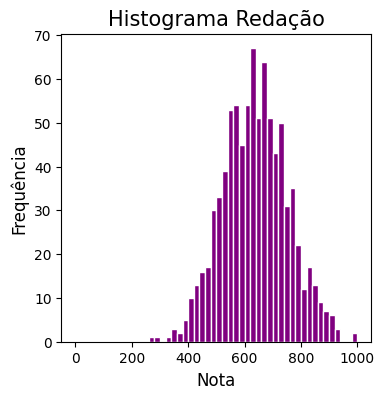

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(enem["Redação"], bins=50, range=[0,1000], color="purple", edgecolor="white")
plt.title("Histograma Redação", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

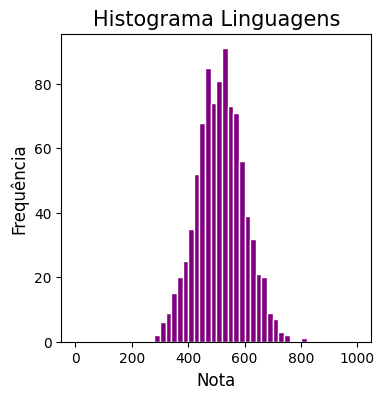

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(enem["Linguagens"], bins=50, range=[0,1000], color='purple', edgecolor="white")
plt.title("Histograma Linguagens", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

**R:Sim, é possível enxergar outliers (3 em Ciências da natureza e 4 em Redação)**


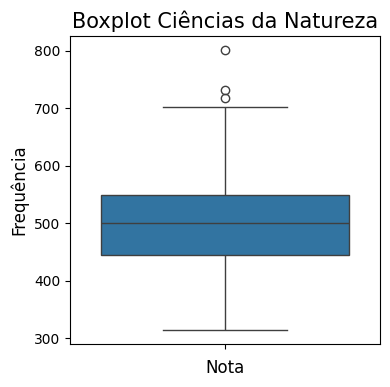

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data = enem["Ciências da natureza"], showfliers = True)
plt.title("Boxplot Ciências da Natureza", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

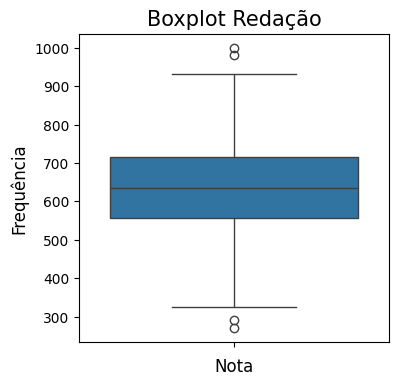

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data = enem["Redação"], showfliers = True)
plt.title("Boxplot Redação", fontsize=15)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tick_params(labelsize=10)

In [ ]:
def outliers(df, column):
  enem.select_dtypes(include=[np.number]).columns
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  min = q1 - 1.5 * iqr
  max = q3 + 1.5 * iqr

  outlier = df[(df[column] < min)|(df[column] > max)][column]
  return outlier

print("Outliers em Ciências da natureza: ",  outliers(enem, "Ciências da natureza").count())
print("Outliers em Redação: ",  outliers(enem, "Redação").count())

Outliers em Ciências da natureza:  3
Outliers em Redação:  4


9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

**R: Não alteram significativamente**

In [ ]:
#removendo outliers da média nacional
media_geral = (enem["Redação"] + enem["Matemática"] + enem["Linguagens"] + enem["Ciências humanas"] + enem["Ciências da natureza"]) / 5
enem["Média Nacional"] = media_geral
media_nac = media_geral.mean()

enem.select_dtypes(include=[np.number]).columns
q1 = enem["Média Nacional"].quantile(0.25)
q3 = enem["Média Nacional"].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

enem_filtrado = enem[([enem["Média Nacional"]] > min) & (enem["Média Nacional"] < max)]

#porcentagem de mudança
nacional_comout = enem["Média Nacional"].mean()
nacional_semout = enem_filtrado["Média Nacional"].mean()
porcentagem = (nacional_semout / nacional_comout) / 100

print("Média nacional sem remoção de outliers: ", nacional_comout)
print("Média nacional após remoção de outliers: ", nacional_semout)
print("Percentual de mudança: ", porcentagem)


if porcentagem >= 0.05:
  print()
  print("Mudança maior que 5%")
else:
  print("Mudança não significativa")

Média nacional sem remoção de outliers:  545.2652640858395
Média nacional após remoção de outliers:  544.8591356381613
Percentual de mudança:  0.009992551727123879
Mudança não significativa


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.


**R: A média é a melhor medida de substituição neste caso, pois é imperceptível a alteração em relação a média e diminui o desvio padrão, o que sinaliza menor dispersão dos dados.**

In [ ]:
enem_antes = media_geral.agg(["mean", np.std])

enem_na_mediana = media_geral.fillna(media_geral.median())
enem_depois_mediana = enem_na_mediana.agg([np.mean, np.std])

enem_na_media = media_geral.fillna(media_geral.mean())
enem_depois_media = enem_na_media.agg([np.mean, np.std])

enem_na_moda = media_geral.fillna(media_geral.mode())
enem_depois_moda = enem_na_moda.agg([np.mean, np.std])

print("Média nacional e desvio padrão antes de tratar os nulos: \n {}\n" .format(enem_antes))
print("Média nacional e desvio padrão depois de tratar os nulos com a mediana: \n {}\n" .format(enem_depois_mediana))
print("Média nacional e desvio padrão depois de tratar os nulos com a média: \n {}\n" .format(enem_depois_media))
print("Média nacional e desvio padrão depois de tratar os nulos com a moda: \n {}\n \n" .format(enem_depois_moda))

Média nacional e desvio padrão antes de tratar os nulos: 
 mean    545.265264
std      39.028818
dtype: float64

Média nacional e desvio padrão depois de tratar os nulos com a mediana: 
 mean    544.571273
std      28.890060
dtype: float64

Média nacional e desvio padrão depois de tratar os nulos com a média: 
 mean    545.265264
std      28.879942
dtype: float64

Média nacional e desvio padrão depois de tratar os nulos com a moda: 
 mean    545.727867
std      38.891689
dtype: float64
 

